In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def homogeneousTransformation (angle, pointToTransform, robotCoordenate): #pointToTransform and robotCoordenate are lists
    pointToTransformMatrix = np.array([])
    robotCoordenateMatrix = np.array([])
    
    for point in pointToTransform:
        pointToTransformMatrix = np.append(pointToTransformMatrix, point)
        
    pointToTransformMatrix = np.append(pointToTransformMatrix, 0) #Append 0 as z coordenate value
    pointToTransformMatrix = np.append(pointToTransformMatrix, 1) #Appended 1 to be able to multiply by de homogenous transform matrix
    pointToTransformMatrix = pointToTransformMatrix.transpose()
    
    for coordenate in robotCoordenate:
        robotCoordenateMatrix = np.append(robotCoordenateMatrix, coordenate)
    
    robotCoordenateMatrix = np.append(robotCoordenateMatrix, 0) #Append 0 as z coordenate value
    
    robotCoordenateMatrix = robotCoordenateMatrix*-1 #By definition of the transformation, to move from base frame to robot frame, we need to put robot frame "on top of" base frame
    
    angle = angle*math.pi/180 #Input angle is on deg, radians needed for the function
    
    rotationInZ = np.array([[math.cos(angle), -math.sin(angle), 0, 0], #Homogeneous transform only with rotation, positive rotation clockwise
                            [math.sin(angle), math.cos(angle), 0, 0],
                            [0, 0, 1, 0],
                            [0, 0, 0, 1]])
    
    traslationXY = [[1, 0, 0, robotCoordenateMatrix[0]], #Homogenneous transform only with translation
                    [0, 1, 0, robotCoordenateMatrix[1]],
                    [0, 0, 1, robotCoordenaºteMatrix[2]],
                    [0, 0, 0, 1]]
    
    homogeneousTransformation = np.matmul(rotationInZ, traslationXY)
    
    transformationResult = np.matmul(homogeneousTransformation, pointToTransformMatrix)
    
    print(pointToTransformMatrix)
    
    return [transformationResult[0], transformationResult[1]] #X and Y positions on robot frame

In [3]:
def rotationZ (pointToTransform, angle):
    pointToTransformMatrix = np.array([])
    
    for point in pointToTransform:
        pointToTransformMatrix = np.append(pointToTransformMatrix, point)
        
    pointToTransformMatrix = np.append(pointToTransformMatrix, 0) #Append 0 as z coordenate value
    
    pointToTransformMatrix = pointToTransformMatrix.transpose()
    
    angle = angle*math.pi/180 #Input angle is on deg, radians needed for the functio

    rotationInZ = np.array([[math.cos(angle), -math.sin(angle), 0], #Rotation in z axis, positive direction clockwise.
                            [math.sin(angle), math.cos(angle), 0],
                            [0, 0, 1]])
    
    transformationResult = np.matmul(rotationInZ, pointToTransformMatrix)
        
    return [transformationResult[0], transformationResult[1]] #Rotated XY coordenates are returned    

In [4]:
def personInNoPredictArea (topRightLimit, topLeftLimit, bottomRightLimit, bottomLeftLimit, personPosi): # since its a square, same X and Y will show twice    
    if (topRightLimit[0] > topLeftLimit[0]): #Check for x position
        if (personPosi[0] >= topLeftLimit[0] and personPosi[0] <= topRightLimit[0]):
            xIn = True
        else:
            xIn = False
    else:
        if (personPosi[0] <= topLeftLimit[0] and personPosi[0] >= topRightLimit[0]):
            xIn = True
        else:
            xIn = False
    
    if (topRightLimit[1] > bottomRightLimit[1]): #Check for Y position
        if (personPosi[1] <= topRightLimit[1] and personPosi[1] >= bottomRightLimit[1]):
            yIn = True
        else:
            yIn = False
    else:
        if (personPosi[1] >= topRightLimit[1] and personPosi[1] <= bottomRightLimit[1]):
            yIn = True
        else:
            yIn = False
    
    if (xIn and yIn):
        return True
    else:
        return False

In [5]:
def initializeLimits (width, length, robotbooty): #The limits of the area are defined on the robot frame
    topRightLimit = [width/2, 0-robotbooty]
    
    topLeftLimit = [-width/2, 0-robotbooty]
    
    bottomRightLimit = [width/2, -length-robotbooty]
    
    bottomLeftLimit = [-width/2, -length-robotbooty]
    
    return topRightLimit, topLeftLimit, bottomRightLimit, bottomLeftLimit

In [6]:
initialized_points = initializeLimits(4, 4, 0.5)
A = initialized_points[0]
B = initialized_points[1]
C = initialized_points[2]
D = initialized_points[3]

personInRobotFrame = homogeneousTransformation(2.06, [4.159, 11.957], [0.883, 11.183])

if(personInNoPredictArea(A, B, C, D, personInRobotFrame)):
    print("The person is inside the No Predict Area")
else:
    print("The person is outside the No Predict Area")


[ 4.159 11.957  0.     1.   ]
The person is outside the No Predict Area


In [7]:
personInRobotFrame

[3.246060594640477, 0.89125900608202]

In [8]:
A

[2.0, -0.5]

In [9]:
B

[-2.0, -0.5]

In [10]:
C

[2.0, -4.5]

In [11]:
D

[-2.0, -4.5]

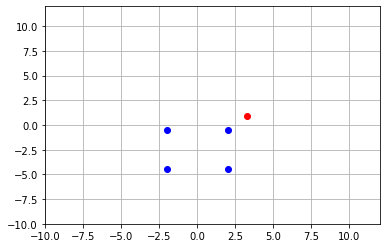

In [12]:
plt.figure()
plt.grid("True")
plt.scatter(A[0], A[1], color = "b")
plt.scatter(B[0], B[1], color = "b")
plt.scatter(C[0], C[1], color = "b")
plt.scatter(D[0], D[1], color = "b")
plt.scatter(personInRobotFrame[0], personInRobotFrame[1], color = "r")
plt.xlim(-10, 12)
plt.ylim(-10, 12)
plt.show()